In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("second_hand_cars.csv")

df.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [3]:
# Lo primero, eliminamos los nans

df.dropna(inplace = True)

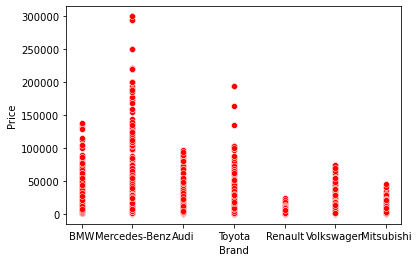

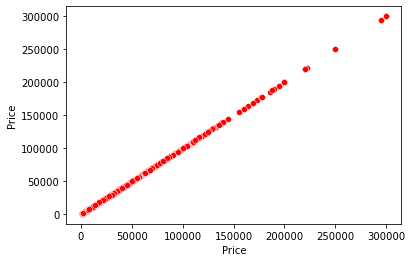

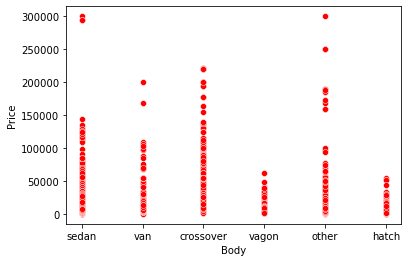

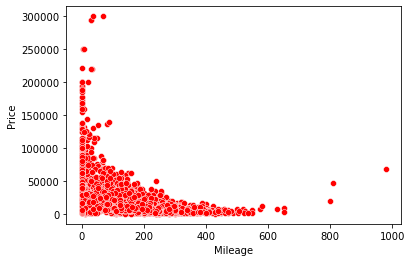

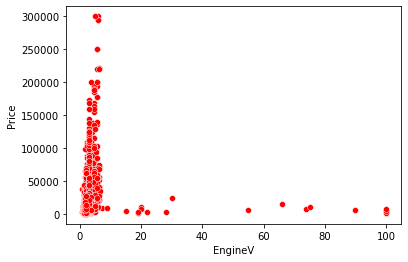

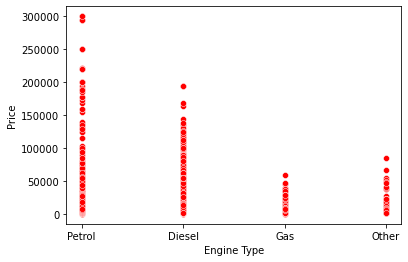

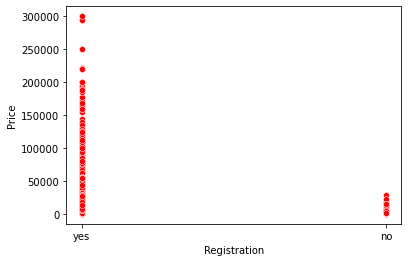

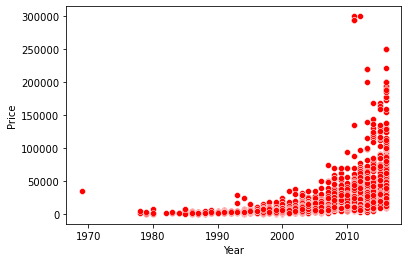

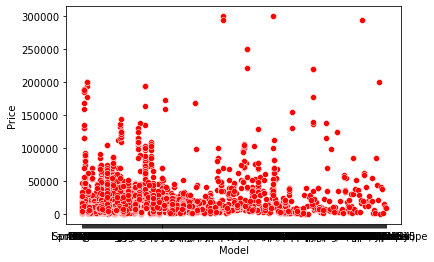

In [4]:
# Veamos como se relacionan todas las columnas con "Price".

for col in df.columns:
    sns.scatterplot(x = df[col], y = df["Price"], color = "r")
    plt.show()

In [5]:
# Vamos a tomar la columna, de valores continuos: "Year".

df[["Year", "Price"]]

,Year,Price
0,1991,4200.0
1,1999,7900.0
2,2003,13300.0
3,2007,23000.0
4,2011,18300.0
...,...,...
4339,2014,17900.0
4340,2014,125000.0
4341,1999,6500.0
4342,1985,8000.0


In [6]:
X = df[["Year"]].values 
y = df[["Price"]].values

X.shape, y.shape

((4025, 1), (4025, 1))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((2817, 1), (2817, 1))
Conjunto de Test: ((1208, 1), (1208, 1))


In [8]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("w_1:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

w_1: [[1916.65950851]]
w_0: [-3825958.34388579]


In [9]:
### Grafico de la Regresión

b = regresion_lineal.intercept_[0]
m = regresion_lineal.coef_[0][0]

# Ecuación de una recta: y = m*x + b

print(f"y = {m}x + {b}")

y = 1916.6595085120891x + -3825958.343885788


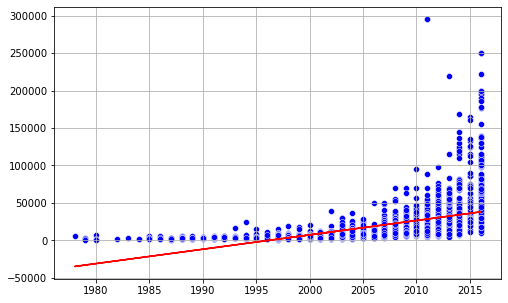

In [10]:
plt.figure(figsize = (8, 5))

# Puntos de entrenamiento (X_train, y_train)
sns.scatterplot(x = X_train.flatten(), y = y_train.flatten(), color = "blue")


# Plot de la Regresión
ecuacion_recta = m*X_train.flatten() + b # Ecuación de la recta y = m*x + b

plt.plot(X_train.flatten(), ecuacion_recta, "red")


plt.grid()
plt.show()

In [11]:
# Predicciones

yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i[0]} \tValor real:{j[0]}")

Predicción:20777.289697974455 	Valor real:26200.0
Predicción:24610.6087149987 	Valor real:23900.0
Predicción:22693.94920648681 	Valor real:40000.0
Predicción:28443.927732022945 	Valor real:10900.0
Predicción:-6055.9434211947955 	Valor real:4300.0


In [12]:
# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 12681.925640683523
MSE:	 520339408.45672184
R**2:	 -2.1616376443751246
RAE:	 0.8665578317559239
RSE:	 0.7886934800961547
Adjusted R**2:	 0.21065254521056487


In [14]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
1203,13100.0,13110.651664,0.0813
751,15000.0,15027.311172,0.1821
212,9300.0,9277.332647,0.2437
253,22600.0,22693.949206,0.4157
615,7400.0,7360.673138,0.5314
675,20900.0,20777.289698,0.5871
1115,13000.0,13110.651664,0.8512
787,13000.0,13110.651664,0.8512
889,18700.0,18860.630189,0.8590
1125,22500.0,22693.949206,0.8620


In [15]:
df_pred.tail(20)

,y_test,yhat,diferencia
940,1350.0,-7972.602930,690.5632
48,2300.0,-13722.581455,696.6340
1030,1600.0,-9889.262438,718.0789
1017,1800.0,15027.311172,734.8506
1089,2650.0,-17555.900472,762.4868
507,2200.0,-15639.240964,810.8746
88,2700.0,-19472.559981,821.2059
50,1900.0,-13722.581455,822.2411
472,2000.0,-15639.240964,881.9620
381,2200.0,-17555.900472,897.9955


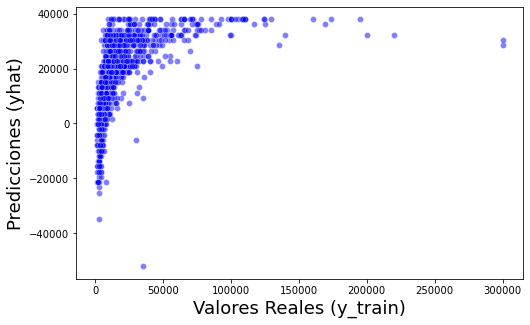

In [16]:
# Vamos a comparar que tan alejados estan los valores reales (y_test) y los valores predichos (y_train)

plt.figure(figsize = (8, 5))

sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

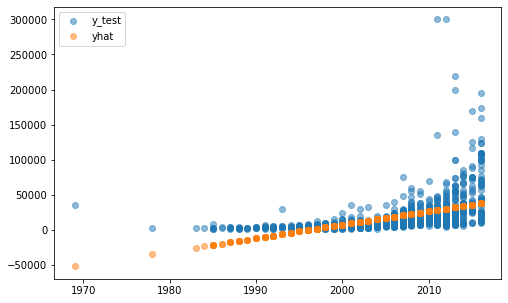

In [17]:
# Si graficamos X_test vs y_test obtenemos la nube de puntos de valores reales

# Si graficamos X_test vs yhat obtenemos la "nube" de puntos de valores predichos

plt.figure(figsize = (8, 5))

plt.plot(X_test, y_test, marker = "o", linestyle = "", label = "y_test", alpha = 0.5)

plt.plot(X_test, yhat, marker = "o", linestyle = "", label = "yhat", alpha = 0.5)

plt.legend()
plt.show()